# 6.3 Kurtosis of Toy Data (4 points)



The file distrib.mat contains three toy datasets (uniform, normal, laplacian), each
10000 samples of 2 sources. Do the following for each dataset (which can be read for example
using Python with loadmat from scipy.io):

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from numpy.linalg import eigh

In [127]:
DataSets=scipy.io.loadmat('distrib.mat')
Normal=DataSets['normal']
Uniform=DataSets['uniform']
Laplacian=DataSets['laplacian']


(a) Apply the following mixing matrix A to the original data s:

In [128]:
A=np.reshape([4,3,2,1],(2,2))
MixN=np.dot(A,Normal)
MixU=np.dot(A,Uniform)
MixL=np.dot(A,Laplacian)

(b) Center the mixed data to zero mean.

In [133]:
Center_N=(MixN.T-MixN.mean(axis=1)).T
Center_U=(MixU.T-MixU.mean(axis=1)).T
Center_L=(MixL.T-MixL.mean(axis=1)).T

(c) Decorrelate the data by applying principal component analysis (PCA) and project them onto
the principal components (PCs).


In [144]:
def PCA(data):
    Cov=np.cov(data)
    E,V=eigh(Cov)
    key = np.argsort(E)[::-1]
    E, V = E[key], V[:, key]
    NewData=np.dot(data.T,V)
    return E,V,NewData.T
    
E_N,V_N,NewData_N=PCA(Center_N)
E_U,V_U,NewData_U=PCA(Center_U)
E_L,V_L,NewData_L=PCA(Center_L)


(d) Scale the data to unit variance in each PC direction (now the data is whitened or sphered).

In [140]:
Scale_N=(NewData_N.T/np.std(NewData_N,axis=1)).T
Scale_U=(NewData_U.T/np.std(NewData_U,axis=1)).T
Scale_L=(NewData_L.T/np.std(NewData_L,axis=1)).T

(e) Rotate the data by different angles θ

(f) Find the minimum and maximum kurtosis value for the first dimension and rotate the data
accordingly.


Plot the original dataset (sources) and the mixed dataset after the steps (a), (b), (c), (d),
and (f) as a scatter plot and display the respective marginal histograms. For step (e) plot
the kurtosis value as a function of angle for each dimension.

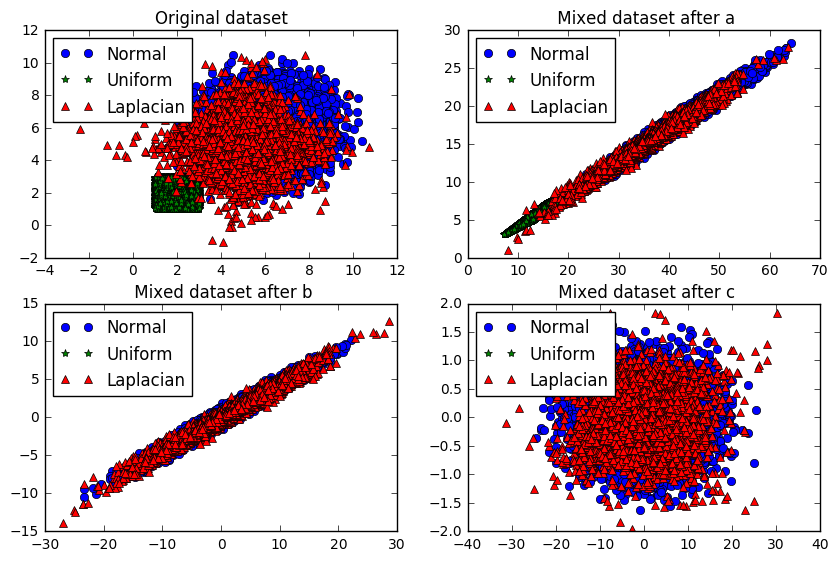

In [142]:
plt.figure(1,figsize=(10,10))
plt.subplot(321)
plt.title('Original dataset')
N,=plt.plot(Normal[0],Normal[1],'o',label='Normal')
U,=plt.plot(Uniform[0],Uniform[1],'*',label='Uniform')
L,=plt.plot(Laplacian[0],Laplacian[1],'^',label='Laplacian')
plt.legend(loc='upper left')

plt.subplot(322)
plt.title(' Mixed dataset after a')
N1,=plt.plot(MixN[0],MixN[1],'o',label='Normal')
U1,=plt.plot(MixU[0],MixU[1],'*',label='Uniform')
L1,=plt.plot(MixL[0],MixL[1],'^',label='Laplacian')
plt.legend(loc='upper left')

plt.subplot(323)
plt.title(' Mixed dataset after b')
N2,=plt.plot(Center_N[0],Center_N[1],'o',label='Normal')
U2,=plt.plot(Center_U[0],Center_U[1],'*',label='Uniform')
L2,=plt.plot(Center_L[0],Center_L[1],'^',label='Laplacian')
plt.legend(loc='upper left')

plt.subplot(324)
plt.title(' Mixed dataset after c')
N2,=plt.plot(NewData_N[0],NewData_N[1],'o',label='Normal')
U2,=plt.plot(NewData_U[0],NewData_U[1],'*',label='Uniform')
L2,=plt.plot(NewData_L[0],NewData_L[1],'^',label='Laplacian')
plt.legend(loc='upper left')

 Compare the histograms after rotation by θmin and θmax for the different distributions.
